In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as pathces
import helper_functions as utils
import datasets.toy_example as dataset
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def plot_vectors_combined_n(U,n,num_vecs=2,ymin=None,ymax=None,title=None,figsize=None,savefig=False,save_filename=None):
    dict_ = {0:'A',1:'B',2:'C',3:'D'}
    colors = ['tab:blue','tab:orange']
    num_data = len(U)
    cmap = cm.get_cmap(name='rainbow')
    color_vec = cmap(np.arange(256))
    figsize = (12,10) if figsize is None else figsize
    fig,ax = plt.subplots(1,num_data,figsize = figsize)
    for i in range(num_vecs): 
        V,y_i,l_i = [],[],[]
        for j in range(num_data):
            Vcur = U[j][i,:]
            ax[j].plot(Vcur,label="$(V_{})_{}$".format(dict_[j],i+1),color=colors[j])
            y_i_cur = np.min(Vcur)
            l_i_cur = np.max(Vcur)-np.min(Vcur)
            y_i.append(y_i_cur)
            l_i.append(l_i_cur)
    if ymin is not None and ymax is not None:
        ax[0].set_ylim([ymin,ymax])
        ax[1].set_ylim([ymin,ymax])
        l_i = [ymax-ymin for j in range(num_data)]
        y_i = [ymin for j in range(num_data)]
        
    for n_idx,j in enumerate(n):
        x_j = np.sum(n[:n_idx]) if n_idx else 0
        p_d = n[n_idx]
        for k in range(num_data):
            rect_cur_j = pathces.Rectangle((x_j,y_i[k]), p_d, l_i[k], color=color_vec[(250//len(n))*n_idx],alpha = 0.1)
            ax[k].add_patch(rect_cur_j)
    plt.suptitle(title,fontsize=20)   
    for i in range(num_data):
        ax[i].legend(fontsize=18,loc = 'lower left',handlelength=1)
        ax[i].tick_params(labelsize=20)
        ax[i].set_xticks([0,100,200])
        if i:
            ax[i].set_yticks([])
    fig.subplots_adjust(wspace=0.05, hspace=0)
    if savefig:
        plt.savefig(save_filename)
    

In [3]:
m = 10000
pos_corr = True
seed1 = 100
seed2 = 11
seed3 = 2
n_A = [75,25,100]
type_A = [2,2,2]
cov_A = None
n_B = [100,25,75]
type_B = [2,1,1]
n_C = [75,25,100]
type_C = [12,12,11]

n = [75,25,25,75]

p = np.sum(n_A)
X_A,cov_A = dataset.generate_simulated_data_cases(n_A,type_A,m,cov=cov_A,pos_corr=pos_corr,seed=seed1)
X_B,cov_B = dataset.generate_simulated_data_cases(n_B,type_B,m,cov=cov_A,pos_corr=pos_corr,seed=seed2)
X_A,cov_A = dataset.generate_simulated_data_cases(n_C,type_C,m,cov=cov_A,cov2=cov_B,pos_corr=pos_corr,seed=seed3)

k = 30
d = 20
results = utils.compute_diff_vectors(X_A.T,X_B.T,k,d)

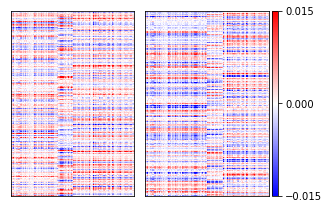

In [4]:
fig = plt.figure(figsize=(5,3.4)) 
ax = [fig.add_subplot(1,2,i+1) for i in range(2)]

for a in ax:
    a.set_aspect('equal')
    a.set_yticks([])
    a.set_xticks([])
X = X_A
num_samples = 300
ax[0].imshow(X[:,:num_samples].T,cmap=plt.get_cmap("bwr"),vmin=-0.015,vmax=0.015)
X = X_B
num_samples = 300
im = ax[1].imshow(X[:,:num_samples].T,cmap=plt.get_cmap("bwr"),vmin=-0.015,vmax=0.015)

divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im,ticks=[-0.015,0,0.015],cax=cax)
fig.subplots_adjust(wspace=0.001, hspace=0)

Text(0.5, 0.98, 'b) Correlation Matrices of $X_A$ (left) and $X_B$ (right)')

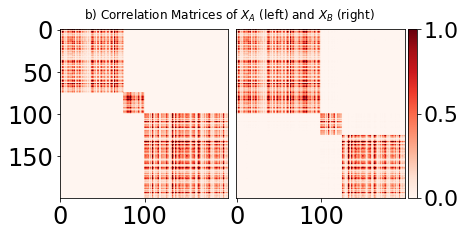

In [5]:
temp1 = (X_A-np.mean(X_A,axis=-1,keepdims=True))@(X_A-np.mean(X_A,axis=-1,keepdims=True)).T
temp2 = (X_B-np.mean(X_B,axis=-1,keepdims=True))@(X_B-np.mean(X_B,axis=-1,keepdims=True)).T

fig = plt.figure(figsize=(6.5,3.1)) 
ax = [fig.add_subplot(1,2,i+1) for i in range(2)]

for i,a in enumerate(ax):
    a.tick_params(labelsize=24)
    a.set_aspect('equal')
    if i:
        a.set_yticks([])
    else:
        a.set_yticks([0,50,100,150])

num_samples = 300
ax[0].imshow(temp1,cmap=plt.get_cmap("Reds"),vmin=0,vmax=1)
im = ax[1].imshow(temp2,cmap=plt.get_cmap("Reds"),vmin=0,vmax=1)
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(im,ticks=[0,0.5,1],cax=cax)
cb.ax.tick_params(labelsize=22)
fig.subplots_adjust(wspace=0.01, hspace=0)
plt.suptitle("b) Correlation Matrices of $X_A$ (left) and $X_B$ (right)")

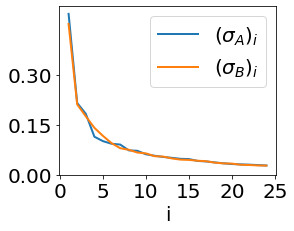

In [6]:
num_sig = 25
plt.figure(figsize=(3.9,3.1))
plt.plot(range(1,num_sig),results["lam_A_diff"][1:num_sig],label='$(\sigma_A)_i$',linewidth=2)
plt.plot(range(1,num_sig),results["lam_B_diff"][1:num_sig],label='$(\sigma_B)_i$',linewidth=2)
# plt.xlim([0,40])
plt.xlabel("i",fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks([0,0.15,0.3],fontsize=20)
plt.show()

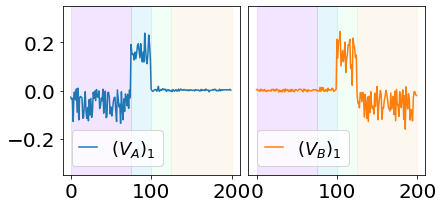

In [7]:
savefig = False
save_filename = ""
plot_vectors_combined_n([results["V_A_diff"][1:],results["V_B_diff"][1:]],n,num_vecs=1,
                            ymin=-0.35,ymax=0.35,title="",
                            figsize=(6.5,3.1),savefig=savefig,save_filename=save_filename)


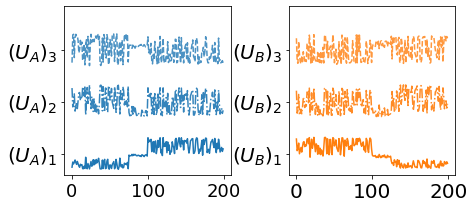

In [8]:
marker = ['-','-.','--']
num_vecs = 3
factor = 0.37
plt.figure(figsize=(7,3.1))
plt.subplot(1,2,1)
for i in range(num_vecs):
    plt.plot(results["V_A"][:,i]+i*factor,marker[i],color="tab:blue",alpha=1-0.1*i)
ticks = [i*factor for i in range(num_vecs)]
idx = np.arange(num_vecs)+1
plt.yticks(ticks,labels=["$(U_A)_{}$".format(i) for i in idx],fontsize=20)
plt.xticks([0,100,200],fontsize=18)
plt.ylim([-0.15,1.05])
plt.subplot(1,2,2)
for i in range(3):
    plt.plot(results["V_B"][:,i]+i*factor,marker[i],color="tab:orange",alpha=1-0.1*i)    
ticks = [i*factor for i in range(num_vecs)]
idx = np.arange(num_vecs)+1
plt.yticks(ticks,labels=["$(U_B)_{}$".format(i) for i in idx],fontsize=20)
plt.xticks([0,100,200],fontsize=20)
plt.ylim([-0.15,1.05])
plt.subplots_adjust(wspace=.35, hspace=0)